## Python statistics essential training - 03_05_morevariables

Standard imports

In [7]:
import numpy as np
import scipy.stats
import pandas as pd

In [8]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [9]:
import re
import mailbox
import csv

In [10]:
gapminder = pd.read_csv('gapminder.csv')

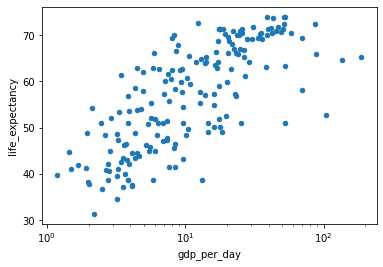

In [11]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx = True)
    
    
plotyear(1965)

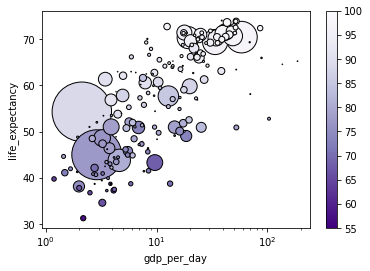

In [19]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx = True, s=area, c = color,
                      colormap = matplotlib.cm.get_cmap('Purples_r'), vmin=55,vmax=100, linewidths=1, edgecolors = 'k', sharex=False)
    
    
plotyear(1965)

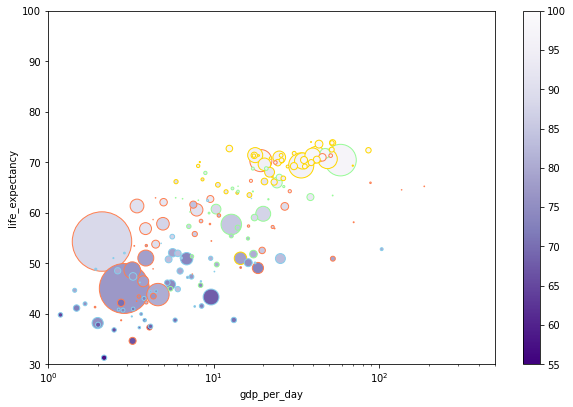

In [22]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue', 'Europe':'gold','America':'palegreen','Asia':'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx = True, s=area, c = color,
                      colormap = matplotlib.cm.get_cmap('Purples_r'),
                      vmin=55,vmax=100, linewidths=1, edgecolors = edgecolor, sharex=False, figsize=(10,6.5))
    
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
    
plotyear(1965)

In [23]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [24]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [25]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

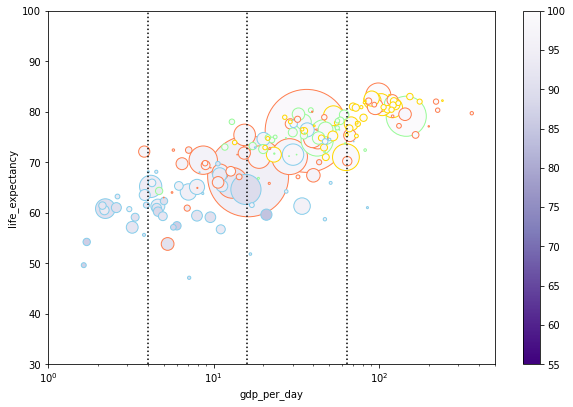

In [27]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue', 'Europe':'gold','America':'palegreen','Asia':'coral'})
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx = True, s=area, c = color,
                      colormap = matplotlib.cm.get_cmap('Purples_r'),
                      vmin=55,vmax=100, linewidths=1, edgecolors = edgecolor, sharex=False, figsize=(10,6.5))
    
    for level in [4,16,64]:
        pp.axvline(level,linestyle = ':',color='k')
    
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
    
plotyear(2015)

array([[<AxesSubplot:xlabel='log10gdp_per_day', ylabel='log10gdp_per_day'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='log10gdp_per_day'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='log10gdp_per_day'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='log10gdp_per_day'>],
       [<AxesSubplot:xlabel='log10gdp_per_day', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='life_expectancy'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='life_expectancy'>],
       [<AxesSubplot:xlabel='log10gdp_per_day', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='life_expectancy', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='age5_surviving', ylabel='age5_surviving'>,
        <AxesSubplot:xlabel='babies_per_woman', ylabel='age5_surviving'>],
       [<AxesSubplot:xlabel='log10gdp_per_day', ylabel='babies_per_woman'>,
        <AxesSubplot:xlabel='l

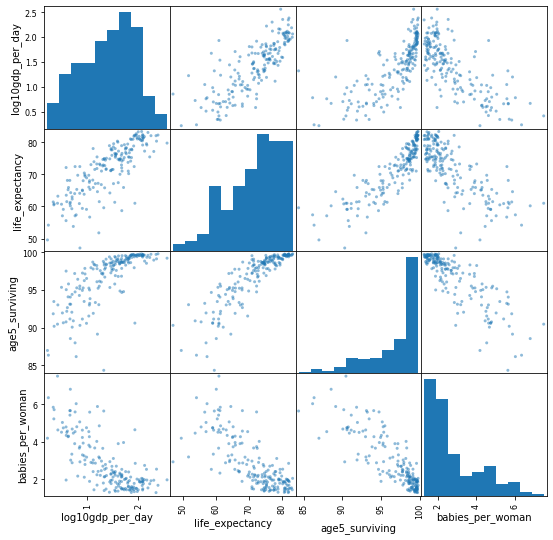

In [30]:
gapminder['log10gdp_per_day'] = np.log10(data['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015, ['log10gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]

pandas.plotting.scatter_matrix(data, figsize=(9,9))
